Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most

In [1]:
#import libraries
#Linear Algebra
import numpy as np
#data processing
import pandas as pd 
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

#to perform PCA 
from sklearn.decomposition import PCA,IncrementalPCA

#Hierarachial Clustering
import scipy.cluster.hierarchy as sch

# multivariate linear regression
from sklearn import linear_model

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#set for the dataset display for max row and column shown for 2000 and if we want any missing data choose none to see all row and columns
pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)
# to display visuals in the notebook
%matplotlib inline



In [2]:
#load dataset
data_dict = pd.read_csv('data-dictionary.csv')
#check dataset
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


### From data dictionary above we can make features description of our dataset


1.country: Name of the country

2.child_mort: Death of children under 5 years of age per 1000 live births

3.exports: Exports of goods and services per capita. Given as %age of the GDP per capita

4.health: Total health spending per capita. Given as %age of GDP per capita

5.imports: Imports of goods and services per capita. Given as %age of the GDP per capita

6.Income: Net income per person

7.Inflation: The measurement of the annual growth rate of the Total GDP

8.life_expectation: The average number of years a new born child would live if the current mortality patterns are to remain the same

9.total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same

10.gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

In [3]:
#load dataset
raw_data = pd.read_csv('country.csv')
#check dataset
raw_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#to check data info.
raw_data.info()
#check the data set for any nan
raw_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
#check any duplicate 
raw_data.duplicated().sum()

0

#### As we can see that the dataset no missing value, no duplicated and small dataset.
Therefore we can go ahead to with EDA

In [6]:
#we copy our dataset so if later we want to make some modification we have raw data to use
data = raw_data.copy()
#check the datatypes
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [7]:
#Find the effect of export import into GDP country
px.scatter(data_frame=data, x='exports', y='imports',size='gdpp', text='country', color='gdpp', title='Countries by Export & Import and corresponding GDP')

In [8]:
#find the effect of income into health and life expectation
px.scatter(data_frame=data, x='life_expec', y='income',size='health', text='country', color='health', title='Countries by income & life expectation and corresponding health')

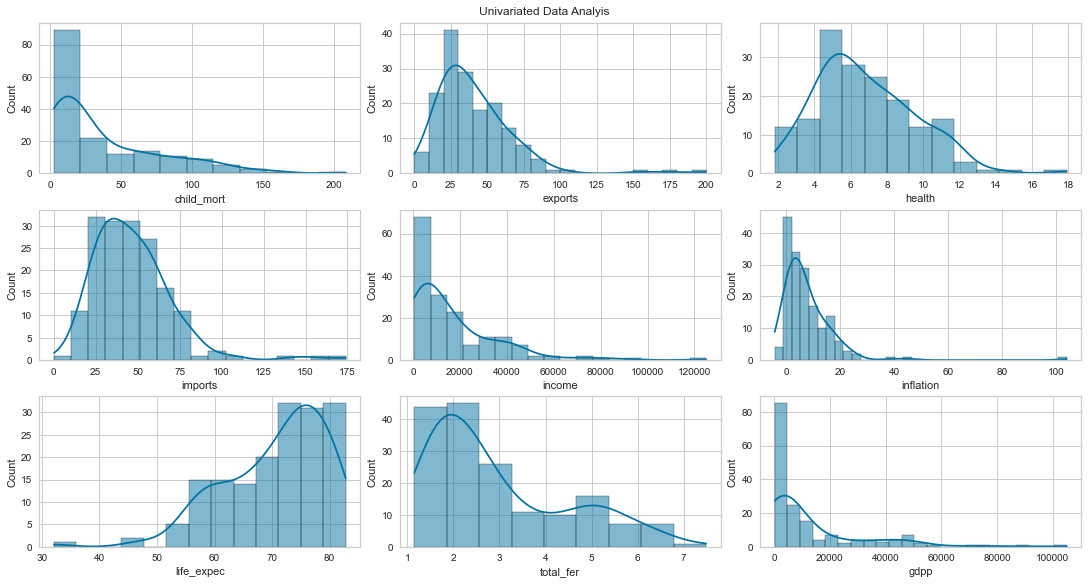

In [9]:
#Univariated Data analysis
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(data[i], ax=ax[x], kde=True)

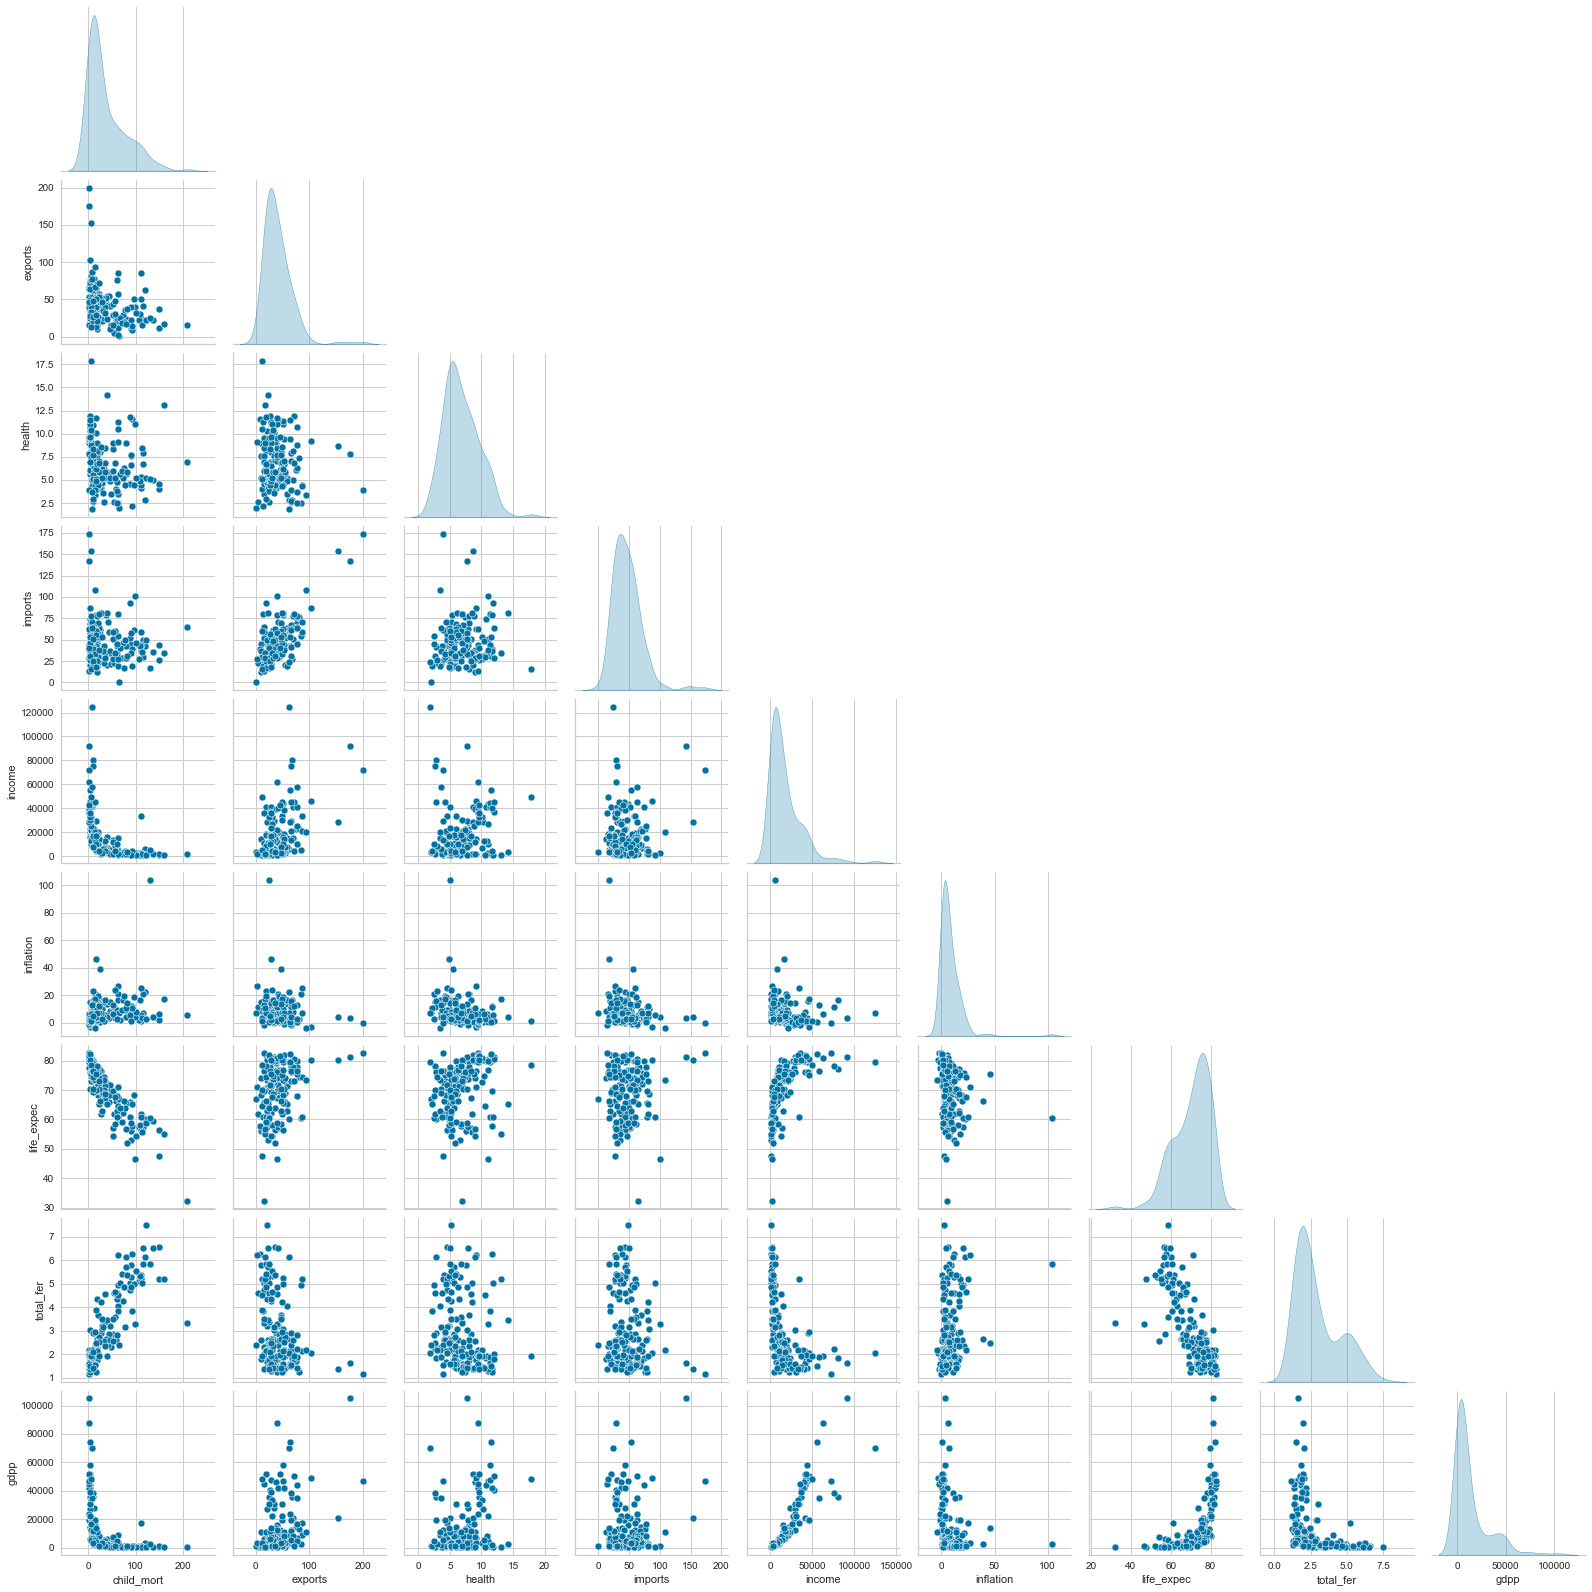

In [10]:
#Bivariated data analysis
sns.pairplot(data, diag_kind = 'kde', corner = True)

In here i will try to used Pearson correlation rather than Kendall and Spearman to measures the strength of linear relationship between two variable.

<AxesSubplot:>

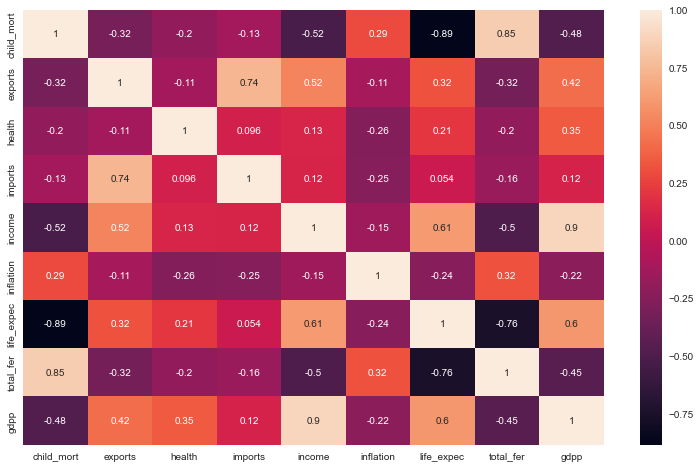

In [11]:
#Pearson Correlation
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(method='pearson', min_periods=1), annot=True)

Many features have relationships with each other.

child_mort clearly increases when income, gdpp & exports decreases. Rise in inflation also leads to high child_mort cases. Economic conditions unfortunately act as an important factor!

Rise in exports clearly increases gdpp, income & imports.

Spending on health has a small rise in life_expec and also decreases the child_mort.

income & gdpp display a very high 0.9 correlation value. From the health perspective, high income has lead to higher life_expec but decreases the total_fer by some significant margin.

As expected high inflation has a negative effect on the financial features. High inflation displays a high total_fer and child_mort. This describes the typical features of a backward nation.

According to the data, higher life_expec displays a low total_fer. Higher gdpp has lead more spending on health.

We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.


The 3 categories of the features are :

health : child_mort, health, life_expec, total_fer

trade : imports, exports

finance : income, inflation, gdpp

Hence, we will dissolve these features into these categories and normalize them!

In [12]:
# eliminate the column that contains the country information, as only numeric values should be used in this case for unsupervised learning
dataset = data.drop('country', axis=1)
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
#create new dataframe for 3 categories
df = pd.DataFrame()
df['Health'] = (dataset['child_mort'] / dataset['child_mort'].mean()) + (dataset['health'] / dataset['health'].mean()) + (dataset['life_expec'] / dataset['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df['Trade'] = (dataset['imports'] / dataset['imports'].mean()) + (dataset['exports'] / dataset['exports'].mean())
df['Finance'] = (dataset['income'] / dataset['income'].mean()) + (dataset['inflation'] / dataset['inflation'].mean()) + (dataset['gdpp'] / dataset['gdpp'].mean())
df.head()

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


## Scalling dataset
Why scale the data in this case? 

* the features have incomparable units (metrics are percentages, dollar values, whole numbers)
* the range values of the features also vary (one for example is 0 to 200, and another 0 to 100,000), so here for example, a change of 50 in one feature is quite significant, whereas in another it is almost unnoticeable
* this level of variance can negatively impact the performance of this model, as this model is based on measuring distances, it can do this by giving more weight to some features 
* by scaling we are removing potential bias that the model can have towards features with higher magnitudes

### Standarisation scalling

In [14]:
# columns argument ==> we'll use this later to create a new dataframe with the rescaled data 
columns = dataset.columns
#scale the dataset using standardisation scalling
scaler = StandardScaler()
# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
scaled_standard =scaler .fit_transform(dataset) 
scaled_standard

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### MinMax Scalling (Normalisation)

In [15]:
# columns argument ==> we'll use this later to create a new dataframe with the rescaled data 
columns = dataset.columns
#scale the dataset using normalisation scalling
scaler1 = MinMaxScaler()
# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
scaled_minmax =scaler1 .fit_transform(dataset) 
scaled_minmax

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

### Scalled dataframe use minmax (normalization) and standardizations

In [16]:
# minmax
# we need to create a new dataframe with the column lables and the rescaled values 
df_minmax = pd.DataFrame(data= scaled_minmax , columns = columns )
df_minmax.tail()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299
166,0.391918,0.184556,0.253574,0.177275,0.021473,0.168284,0.392505,0.670347,0.011731


In [17]:
# standardisation
# we need to create a new dataframe with the column lables and the rescaled values 
df_standard = pd.DataFrame(data= scaled_standard, columns=columns)
df_standard.tail()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754
166,1.114951,-0.150348,-0.338015,-0.662477,-0.721358,0.590015,-2.092785,1.624609,-0.629546


### <a> PCA: Principal Component Analysis</a>

PCA: Principal component analysis
Principal Component Analysis (PCA) is a popular technique for deriving a set of low dimensional features from a large set of variables. Sometimes reduced dimensional set of features can represent distinct no. of groups with similar characteristics. Hence PCA can be an insightful clustering tool (or a preprocessing tool before applying clustering as well). We will standardize our data first and will use the scaled data for all clustering works in future.

In [18]:
#PCA with data scaled with StandardScaler
# fit and transform
pca = PCA(svd_solver='auto')
pca.fit(df_standard)
pca_df_standard = pca.transform(df_standard)
print('Total no of principal components =',pca.n_components_)
#Print Principal Components
print('Principal Component Matrix :\n',pca.components_)

Total no of principal components = 9
Principal Component Matrix :
 [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.1

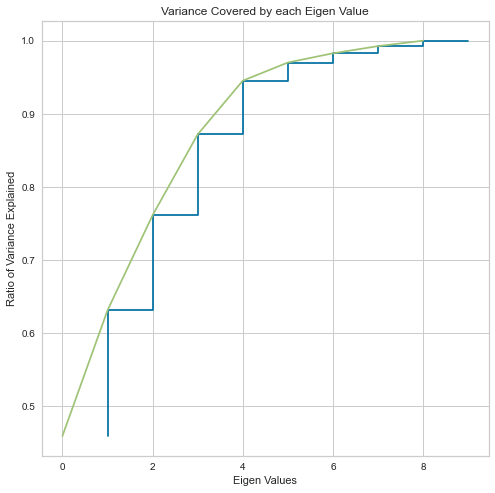

In [19]:
plt.rcParams['figure.figsize'] = 8, 8
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

Let us check the amount of variance explained by each principal component here. They will be arranged in decreasing order of their explained variance ratio.

[0.46 0.63 0.76 0.87 0.94 0.96 0.97 0.98 0.99]


Text(0, 0.5, 'explaned variance ratio')

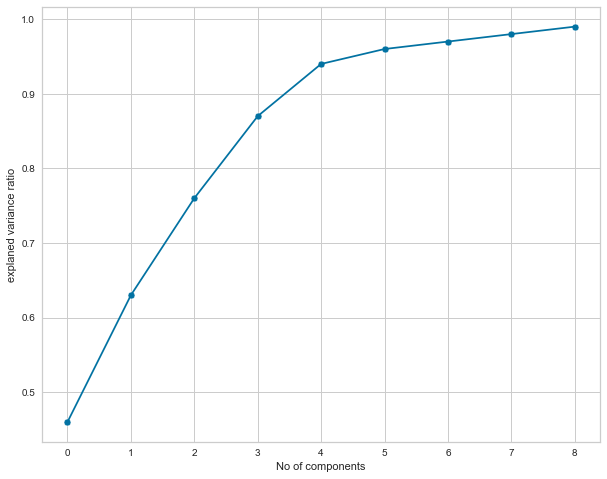

In [20]:
#Plot explained variance ratio for each PC
cum_exp_ratio = np.cumsum(np.round(pca.explained_variance_ratio_,2))
print(cum_exp_ratio)
fig=plt.figure(figsize=(10,8))
ax=sns.lineplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax.set_xlabel('No of components')
ax.set_ylabel('explaned variance ratio')

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

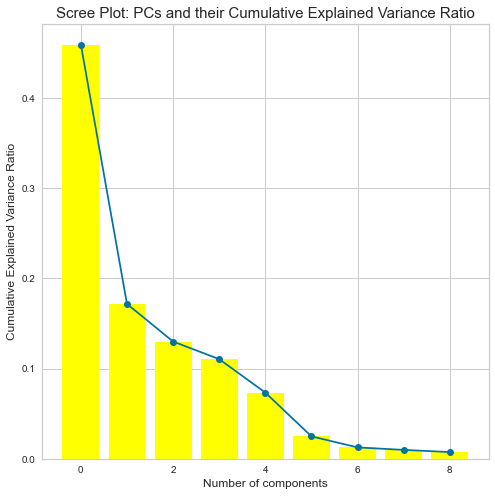

In [21]:
#The amount of variance that each PC explains
var = pca.explained_variance_ratio_
print(var)
#Plot explained variance ratio for each PC
plt.bar([i for i, _ in enumerate(var)],var,color='yellow')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
# Scree Plot
plt.plot(var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)



Text(0, 0.5, 'PC2 - 17.2%')

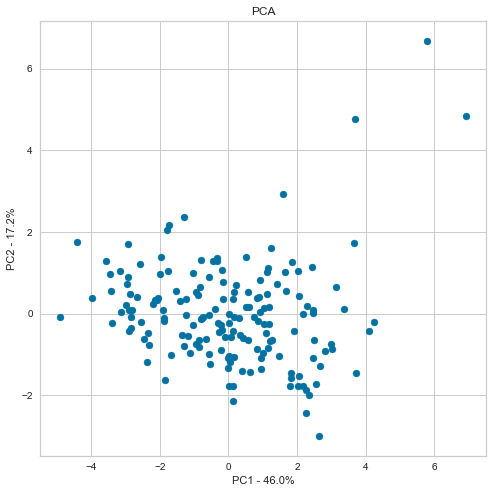

In [23]:
# percentage variation 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot pca
pca_df_standard = pd.DataFrame(pca_df_standard, columns = labels)
plt.scatter(pca_df_standard.PC1, pca_df_standard.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

Now i want to compare using normalisation scalled dataframe

In [24]:
#PCA with data scaled with NormalisationScaler
# fit and transform
pc = PCA(svd_solver='auto')
pc.fit(df_minmax)
pc_df_minmax = pc.transform(df_minmax)
print('Total no of principal components =',pc.n_components_)
#Print Principal Components
print('Principal Component Matrix :\n',pc.components_)

Total no of principal components = 9
Principal Component Matrix :
 [[-0.47646333  0.17033279  0.13388598  0.08161987  0.30698142 -0.08800904
   0.42053483 -0.57108745  0.33824337]
 [ 0.28173309  0.46664393  0.04450977  0.39425729  0.40440481 -0.00160198
  -0.13751974  0.36924598  0.47607761]
 [ 0.1000117  -0.390524    0.78191122 -0.30277481  0.06836671 -0.05702928
   0.00785737  0.17483647  0.30963696]
 [ 0.02908132 -0.18848786 -0.51298346 -0.6066558   0.3728225   0.21262116
   0.14802117  0.17306242  0.31044817]
 [ 0.42095743 -0.10579788 -0.08330309 -0.10081385  0.15996971 -0.2195551
  -0.5564373  -0.62684939  0.13469013]
 [ 0.08309594  0.15131228  0.2081468  -0.01221525  0.02247672  0.92453091
  -0.10955292 -0.23223954 -0.07433502]
 [-0.68892064 -0.06411594  0.0203469  -0.01074206  0.24033746  0.02335202
  -0.6560359   0.17206635 -0.04950529]
 [-0.05031919 -0.64019218 -0.22728423  0.54440667 -0.19006577  0.20070661
   0.00204731 -0.01699321  0.40358904]
 [ 0.14665381 -0.34226896  0.0

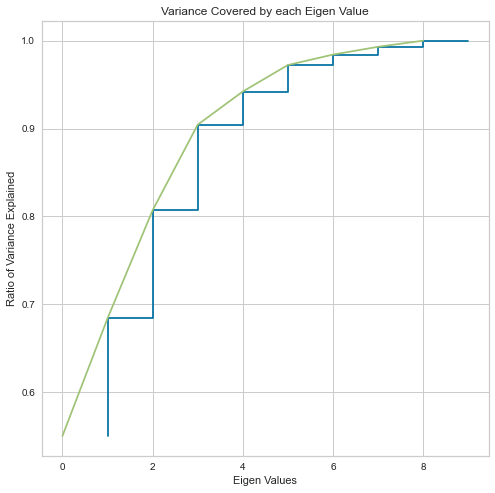

In [25]:
plt.rcParams['figure.figsize'] = 8, 8
plt.step(list(range(1,10)), np.cumsum(pc.explained_variance_ratio_))
plt.plot(np.cumsum(pc.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

[0.55 0.68 0.8  0.9  0.94 0.97 0.98 0.99 1.  ]


Text(0, 0.5, 'explaned variance ratio')

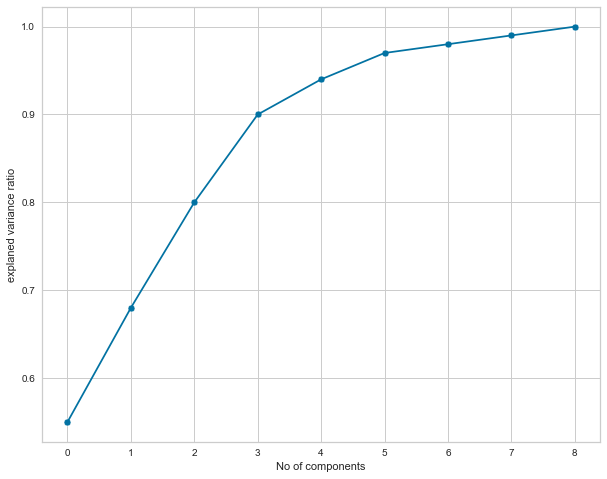

In [26]:
#Plot explained variance ratio for each PC
cum_exp_ratio = np.cumsum(np.round(pc.explained_variance_ratio_,2))
print(cum_exp_ratio)
fig=plt.figure(figsize=(10,8))
ax=sns.lineplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax.set_xlabel('No of components')
ax.set_ylabel('explaned variance ratio')

[0.55001227 0.13384784 0.12301053 0.09749047 0.03777964 0.03013659
 0.01190434 0.00887791 0.00694042]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

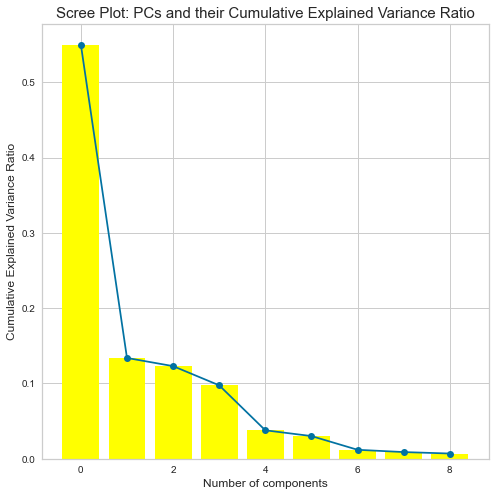

In [27]:
#The amount of variance that each PC explains
vr = pc.explained_variance_ratio_
print(vr)
#Plot explained variance ratio for each PC
plt.bar([i for i, _ in enumerate(vr)],vr,color='yellow')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
# Scree Plot
plt.plot(vr, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

Text(0, 0.5, 'PC2 - 13.4%')

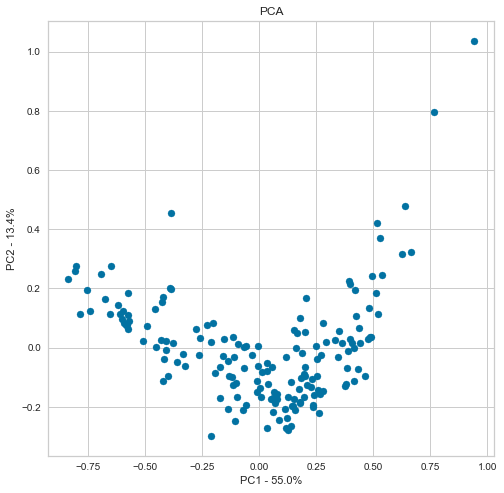

In [28]:
# percentage variation 
per_var = np.round(pc.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot pca
pc_df_minmax = pd.DataFrame(pc_df_minmax, columns = labels)
plt.scatter(pc_df_minmax.PC1, pc_df_minmax.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

from normalisation dataset and standardisation dataset we can get potential cluster 3 or 4 and we will try to make new dataframe with this.therefore i will goes only with std scalled dataset.

In [29]:
# dataframe with PC1, PC2, P3, PC4
data2 = pca_df_standard.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1)
data2.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


We observe the highest silhouette score with no. of clusters 3 and 4. However, from Elbow Curve, we got to see the "knee" like bent at no. of clusters 3. So we will do further analysis to choose the ideal no. of clusters between 3 and 4.

##   K-Means Clustering


Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed. KMean is mostly commonly used clustering algorithm

This is the most popular method of clustering. It uses Euclidean distance between clusters in each iteration to decide a data point should belong to which cluster, and proceed accordingly. To decide how many no. of clusters to consider, we can employ several methods. The basic and most widely used method is Elbow Curve.

Method-1: Plotting Elbow Curve

In this curve, wherever we observe a "knee" like bent, we can take that number as the ideal no. of clusters to consider in K-Means algorithm.

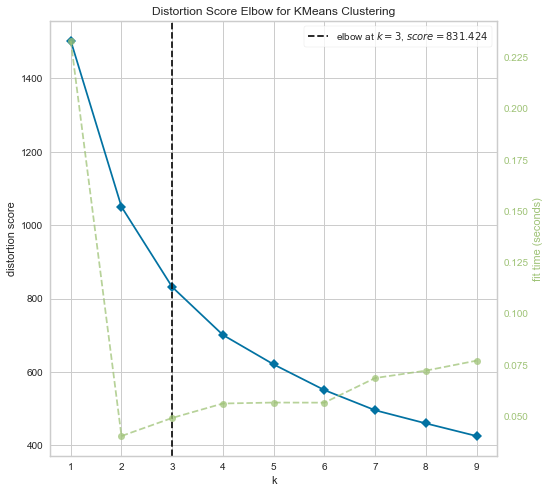

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
#elbow method with std dataset
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(df_standard)
visualize.poof()


Here, along Y-axis, "distortion" is defined as "the sum of the squared differences between the observations and the corresponding centroid". It is same as WCSS (Within-Cluster-Sum-of-Squares).

Let's see the centroids of the clusters. Afterwards, we will fit our scaled data into a K-Means model having 3 clusters, and then label each data point (each record) to one of these 3 clusters.

In [31]:
#Fitting data into K-Means model with 3 clusters
km_3=KMeans(n_clusters=3,random_state=12345)
km_3.fit(df_standard)
print(km_3.cluster_centers_)

#print km labels
print(km_3.labels_)

[[-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]]
[1 0 0 1 0 0 0 2 2 0 0 2 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


We can see each record has got a label among 0,1,2. This label is each of their cluster_id i.e. in which cluster they belong to. We can count the records in each cluster now.

In [32]:
#count the country each label
pd.Series(km_3.labels_).value_counts()

0    84
1    47
2    36
dtype: int64

We see, the highest no. of records belong to the first cluster.

Now, we are interested to check how good is our K-Means clustering model. Silhouette Coefficient is one such metric to check that. The Silhouette Coefficient is calculated using:

the mean intra-cluster distance ( a ) for each sample
the mean nearest-cluster distance ( b ) for each sample
The Silhouette Coefficient for a sample is (b - a) / max(a, b)

In [33]:
# calculate Silhouette Coefficient for K=3
metrics.silhouette_score(df_standard, km_3.labels_)

0.28329575683463126

We observe the highest silhouette score with no. of clusters 3 and 4. However, from Elbow Curve, we got to see the "knee" like bent at no. of clusters 3. So we will do further analysis to choose the ideal no. of clusters between 3 and 4.

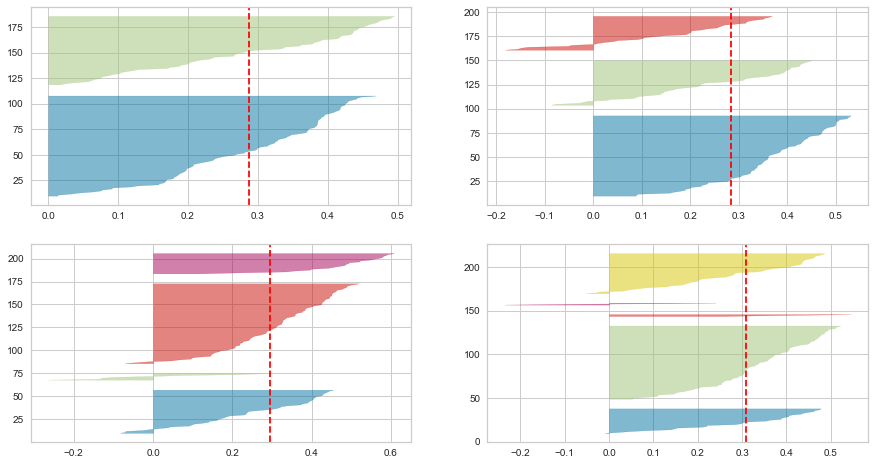

In [34]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_standard)

We get a very prominent silhouette plot for no. of clusters = 3. We recall the KMeans model we fitted earlier on our scaled country data with 3 clusters (km_3). We will use that model again to label each record of our data set with a particular cluster_id.

In [35]:
#try to clustering
cluster_labels = km_3.fit_predict(df_standard)
#
preds = km_3.labels_
data_df = pd.DataFrame(data)
data_df['KM_Clusters'] = preds
data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


<AxesSubplot:xlabel='child_mort', ylabel='income'>

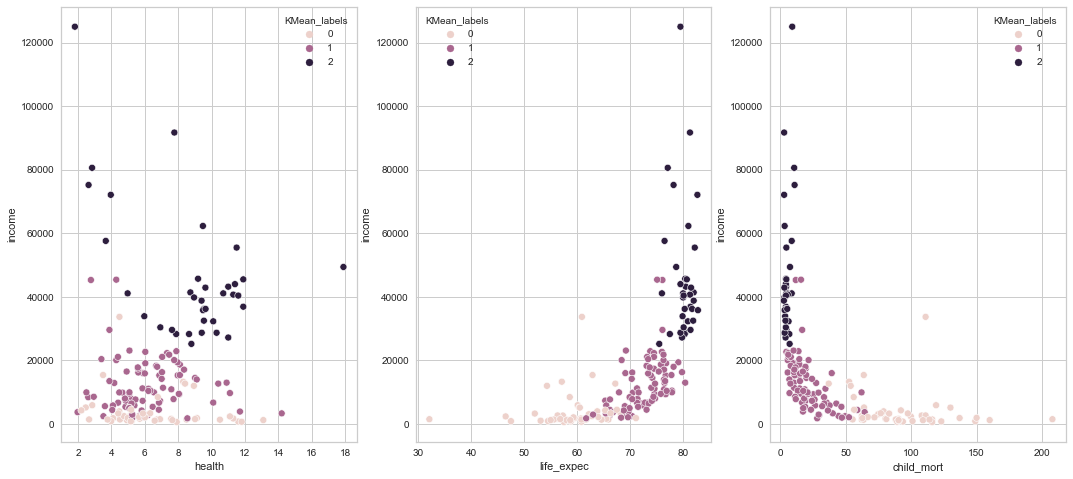

In [36]:
#try to clustering with std dataset
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_standard)
data['KMean_labels']=model.labels_
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.scatterplot(data=data, x='health', y='income', hue='KMean_labels', ax=ax[0])
sns.scatterplot(data=data, x='life_expec', y='income', hue='KMean_labels', ax=ax[1])
sns.scatterplot(data=data, x='child_mort', y='income', hue='KMean_labels', ax=ax[2])

#### Hierarachial Clustering with standardisation dataset and normalisation dataset

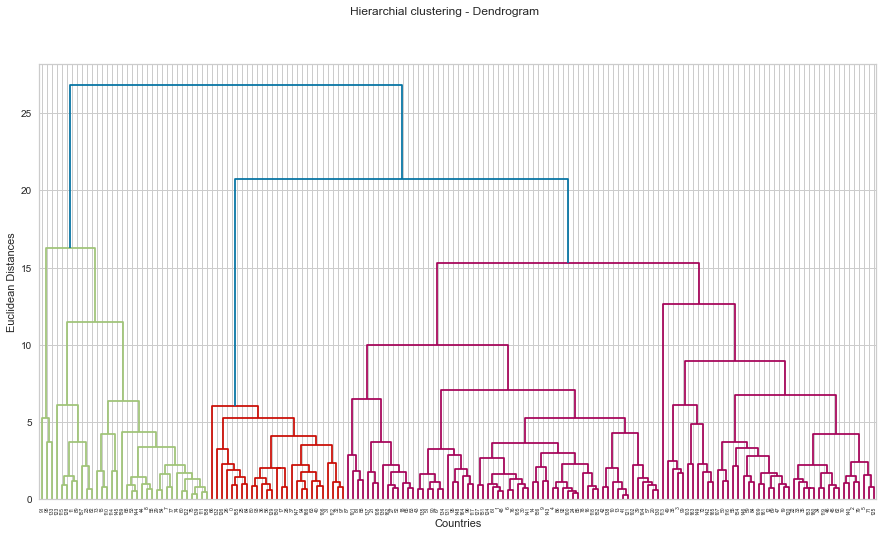

In [37]:
#clustering with standarisation dataset
fig=plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(df_standard, method = 'ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

from standardisation dataset i can assume that has potential 3 or 4 cluster

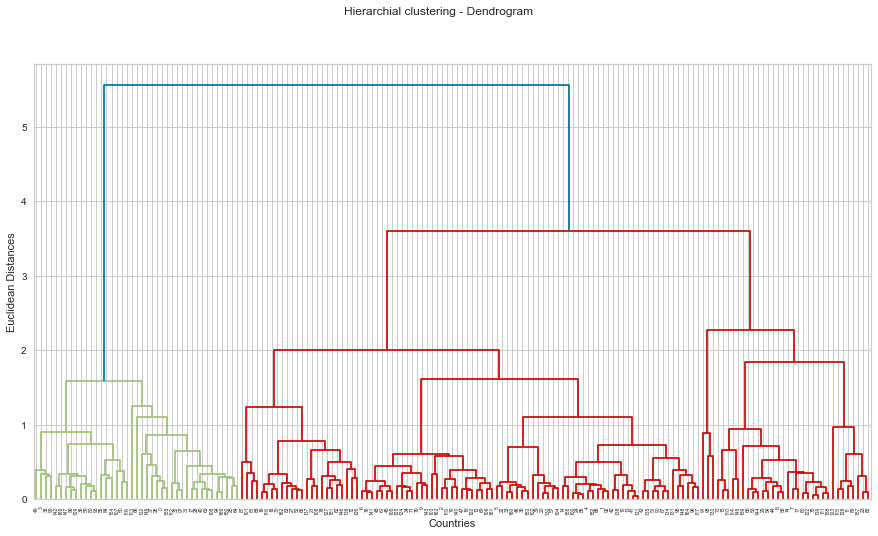

In [38]:
#clustering with normalisation dataset
fig=plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(df_minmax, method = 'ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

from normalisation dataset i assume also has 3 or 4 potential cluster

We observe the highest silhouette score with no. of clusters 3 and 4. However, from Elbow Curve, we got to see the "knee" like bent at no. of clusters 3. So we will do further analysis to choose the ideal no. of clusters between 3 and 4.

In [39]:

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(df_standard)
hcpreds = hc.labels_
data_hc_df = data.drop('KM_Clusters', axis=1)
data_hc_df['Hier_Clusters'] = hcpreds
data_hc_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_labels,Hier_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1


<AxesSubplot:xlabel='child_mort', ylabel='income'>

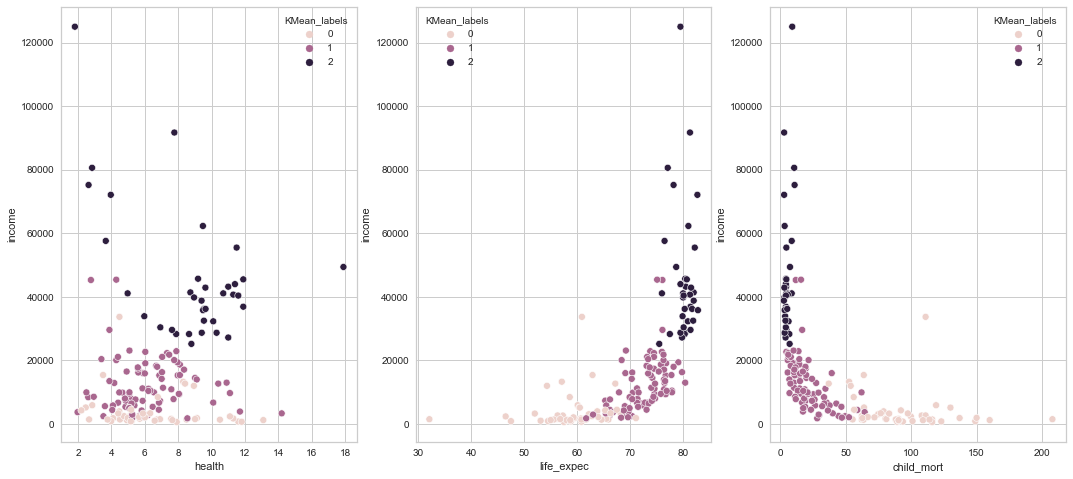

In [40]:
#try to clustering with std dataset
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_standard)
data_hc_df['KMean_labels']=model.labels_
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.scatterplot(data=data_hc_df, x='health', y='income', hue='KMean_labels', ax=ax[0])
sns.scatterplot(data=data_hc_df, x='life_expec', y='income', hue='KMean_labels', ax=ax[1])
sns.scatterplot(data=data_hc_df, x='child_mort', y='income', hue='KMean_labels', ax=ax[2])